In [12]:
import pandas as pd

#LOAD THE DATA 
df = pd.read_csv("delaney_solubility_with_descriptors.csv")


In [13]:
#DATA PREPARATION 
# DATA SEPARATION X , Y 



x = df[['MolWt', 'MolLogP', 'NumRotatableBonds', 'AromaticProportion']]

z = df['logS']



In [14]:
#data splitting x,y 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.2, train_size=0.8)

In [15]:
import joblib
from sklearn.linear_model import LinearRegression
import pickle
from sklearn2pmml import sklearn2pmml


lrmodel = LinearRegression()

lrmodel.fit(x_train,y_train)

with open('Results/LogSmodel.pkl', 'wb') as model_file:
    pickle.dump(lrmodel, model_file)
    

In [16]:
loaded_lrmodel = joblib.load('Results/LogSmodel.pkl')

sklearn2pmml(loaded_lrmodel, 'Results/LogSJava.pmml')

In [17]:
#prediction 

y_lr_trian_prediction = lrmodel.predict(x_train)
y_lr_test_pred = lrmodel.predict(x_test)

# y_lr_test_pred

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

error = mean_squared_error(y_train, y_lr_trian_prediction)

# Calculate Mean Squared Error for testing set
error_test = mean_squared_error(y_test, y_lr_test_pred)

print("Train Mean Squared Error:", error)
print("Test Mean Squared Error:", error_test)

# Calculate R-squared score for training set
lrr2 = r2_score(y_train, y_lr_trian_prediction)

# Calculate R-squared score for testing set
lrr2_test = r2_score(y_test, y_lr_test_pred)

print("Train R-squared:", lrr2)
print("Test R-squared:", lrr2_test)


Train Mean Squared Error: 1.0237210577753033
Test Mean Squared Error: 0.9545941229708277
Train R-squared: 0.7724556738162458
Test R-squared: 0.758363625751172


In [19]:
import pandas as pd

# Assuming you have the following variables: error, lrr2, error_test, lrr2_test

# Create a list of lists for the data
data = [['Results', error, lrr2, error_test, lrr2_test]]

# Create a DataFrame from the data
modelresults = pd.DataFrame(data, columns=['Dataset', 'Train Error', 'Train R2', 'Test Error', 'Test R2'])


In [20]:
try:
    modelresults.to_csv('Results/results.csv', index=False)
    print("CSV file saved successfully.")
except Exception as e:
    print("An error occurred while saving the CSV file:", e)   

CSV file saved successfully.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

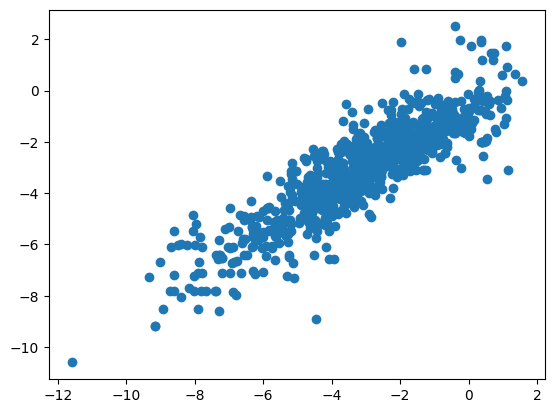

In [21]:
import matplotlib.pyplot as plt 

plt.scatter(x=y_train , y= y_lr_trian_prediction)

plt.plot

In [22]:
#Test The Model Using Values 

testset = [2.77,166.99,3.5,0.996]


lrmodel.predict(testset)

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[  2.77  166.99    3.5     0.996].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.